In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
alldata_set = train.append(test).reset_index(drop=True)
testid = test['PassengerId']
print(alldata_set.shape)
alldata_set.isnull().sum()


(1309, 12)


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [3]:
train.info()
print('train set shape',train.shape)
print('test set shape',test.shape)
print('Age missing',train.iloc[:891].Age.isnull().sum(),'   ',
      (train.iloc[:891].Age.isnull().sum())/int(891)*int(100),'%')
print('Cabin missing',train.iloc[:891].Cabin.isnull().sum(),'   ',
      (train.iloc[:891].Cabin.isnull().sum())/int(891)*int(100),'%')
print('Embarked missing',train.iloc[:891].Embarked.isnull().sum(),'   ',
      (train.iloc[:891].Embarked.isnull().sum())/int(891)*int(100),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
train set shape (891, 12)
test set shape (418, 11)
Age missing 177     19.865319865319865 %
Cabin missing 687     77.10437710437711 %
Embarked missing 2     0.22446689113355783 %


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


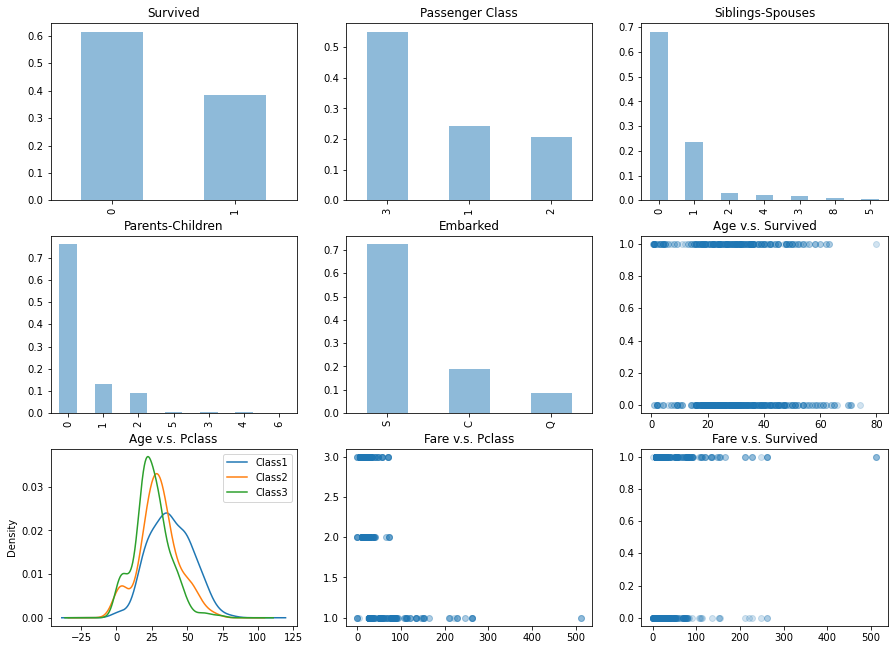

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

plt.subplot2grid((4,3),(0,0))
train.Survived.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.title('Survived')

plt.subplot2grid((4,3),(0,1))
train.Pclass.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.title('Passenger Class')

plt.subplot2grid((4,3),(0,2))
train.SibSp.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.title('Siblings-Spouses')

plt.subplot2grid((4,3),(1,0))
train.Parch.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.title('Parents-Children')


plt.subplot2grid((4,3),(1,1))
train.Embarked.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.title('Embarked')

plt.subplot2grid((4,3),(1,2))
plt.scatter(train.Age, train.Survived, alpha=.2)
plt.title('Age v.s. Survived')


plt.subplot2grid((4,3),(2,0))
for x in [1,2,3]:
    train.Age[train.Pclass == x].plot(kind='kde')
plt.title('Age v.s. Pclass')
plt.legend(('Class1', 'Class2','Class3'))

plt.subplot2grid((4,3),(2,1))
plt.scatter(train.Fare, train.Pclass, alpha=.2)
plt.title('Fare v.s. Pclass')

plt.subplot2grid((4,3),(2,2))
plt.scatter(train.Fare, train.Survived, alpha=.2)
plt.title('Fare v.s. Survived')

plt.show()

Sex       female  male
Survived              
0             81   468
1            233   109


Text(0.5, 1.0, 'Sex v.s. Survived')

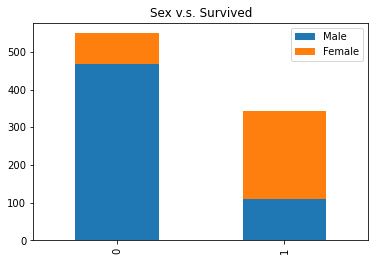

In [6]:
print(pd.pivot_table(train,values='PassengerId',index='Survived',
                  columns='Sex',aggfunc='count'))

Male_sur=train.Survived[train.Sex=='male'].value_counts()
Female_sur=train.Survived[train.Sex=='female'].value_counts()
sig_sex=pd.DataFrame({'Male':Male_sur,'Female':Female_sur})
sig_sex.plot(kind='bar',stacked=True)
plt.title('Sex v.s. Survived')

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Text(0.5, 1.0, 'Class v.s. Survived')

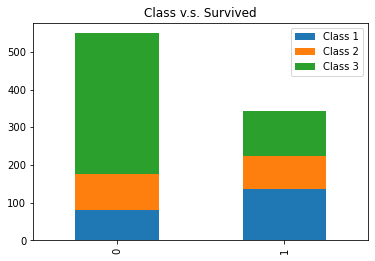

In [7]:
print(pd.pivot_table(train,values='PassengerId',index='Survived',
                  columns='Pclass',aggfunc='count'))

C1_sur=train.Survived[train.Pclass==1].value_counts()
C2_sur=train.Survived[train.Pclass==2].value_counts()
C3_sur=train.Survived[train.Pclass==3].value_counts()
sig_class=pd.DataFrame({'Class 1':C1_sur,'Class 2':C2_sur,'Class 3':C3_sur})
sig_class.plot(kind='bar',stacked=True)
plt.title('Class v.s. Survived')

Pclass            1   2    3
Sex    Survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47


Text(0.5, 1.0, 'Unsurvived Male v.s. Unsurvived Female')

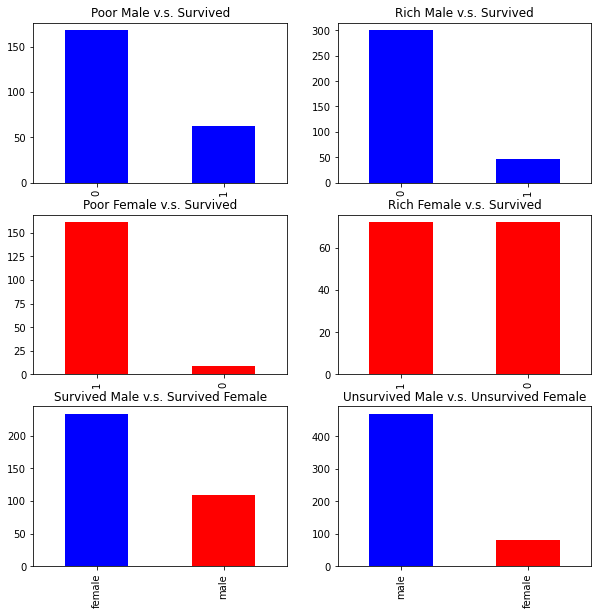

In [8]:
print(pd.pivot_table(train,values='PassengerId',index=['Sex','Survived'],
                  columns='Pclass',aggfunc='count'))


C12_m_sur=train.Survived[train.Pclass!=3][train.Sex=='male'].value_counts()
C3_m_sur=train.Survived[train.Pclass==3][train.Sex=='male'].value_counts()
C12_f_sur=train.Survived[train.Pclass!=3][train.Sex=='female'].value_counts()
C3_f_sur=train.Survived[train.Pclass==3][train.Sex=='female'].value_counts()

fig = plt.figure(figsize=(10,10))
plt.subplot2grid((3,2),(0,0))
train.Survived[train.Pclass!=3][train.Sex=='male'].value_counts().plot(kind='bar',color='blue')
plt.title('Poor Male v.s. Survived')

plt.subplot2grid((3,2),(0,1))
train.Survived[train.Pclass==3][train.Sex=='male'].value_counts().plot(kind='bar',color='blue')
plt.title('Rich Male v.s. Survived')

plt.subplot2grid((3,2),(1,0))
train.Survived[train.Pclass!=3][train.Sex=='female'].value_counts().plot(kind='bar',color='red')
plt.title('Poor Female v.s. Survived')

plt.subplot2grid((3,2),(1,1))
train.Survived[train.Pclass==3][train.Sex=='female'].value_counts().plot(kind='bar',color='red')
plt.title('Rich Female v.s. Survived')

plt.subplot2grid((3,2),(2,0))
train.Sex[train.Survived==1].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Survived Male v.s. Survived Female')

plt.subplot2grid((3,2),(2,1))
train.Sex[train.Survived==0].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Unsurvived Male v.s. Unsurvived Female')


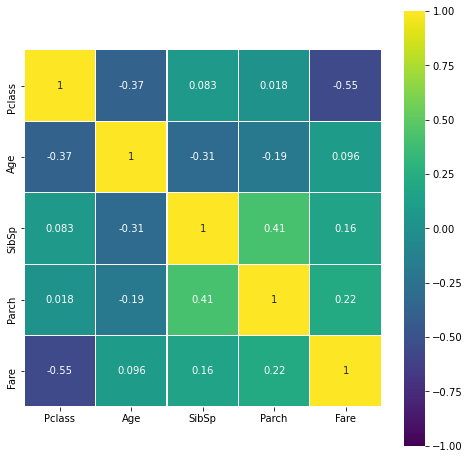

In [9]:
import seaborn as sns

dfc = train.copy()
dfc = dfc.drop(['PassengerId','Survived'], axis=1)
corr = dfc.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr,cmap='viridis',vmax=1.0,vmin=-1.0,linewidths=0.1,annot=True, annot_kws={"size": 10}, square=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


{'Sir', 'Jonkheer', 'Major', 'Capt', 'the Countess', 'Dona', 'Mrs', 'Master', 'Don', 'Dr', 'Lady', 'Mlle', 'Rev', 'Ms', 'Mr', 'Mme', 'Miss', 'Col'}
Name_revised    0    1   2   3
Survived                      
0.0           436   81  17  15
1.0            82  231  23   6


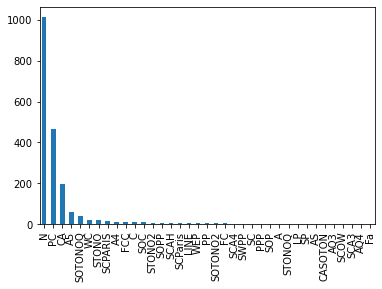

In [10]:
import matplotlib.pyplot as plt



alldata_set['Age_revised'] = alldata_set['Age'] 
nan_age_row = []
nan_age_row = alldata_set['Age'][alldata_set['Age'].isnull()].index

for i in nan_age_row:
    group_median = alldata_set['Age'][(alldata_set['SibSp'] == alldata_set.iloc[i]['SibSp']) & (alldata_set['Pclass'] == alldata_set.iloc[i]['Pclass']) & (alldata_set['Parch'] == alldata_set.iloc[i]['Parch'])].median()
    if np.isnan(group_median):
        alldata_set['Age_revised'].iloc[i] = alldata_set['Age'].median()
    else:
        alldata_set['Age_revised'].iloc[i] = group_median
    #print('Missing Age at row: ',i,', fill with value: ', alldata_set['Age_revised'].iloc[i])
    
    

    
alldata_set['Fare_revised'] = alldata_set['Fare'].fillna(alldata_set['Fare'].median())
alldata_set['Fare_revised'].isnull().sum()
alldata_set['Fare_revised'] = alldata_set.Fare_revised.map(lambda x: np.log(x) if x>0 else 0)





names = set() # adds a given element to a set if the element is not present in the set
for name in alldata_set['Name']:
    names.add(name.split(',')[1].split('.')[0].strip())
print(names)
alldata_set['Name_revised'] = alldata_set['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
alldata_set.Name_revised.value_counts().plot(kind='bar')
alldata_set['Name_revised'] = alldata_set['Name_revised'].replace(['Dr','Rev','Col','Major','Dona','Jonkheer','the Countess','Don','Capt'], 'Specialist')
alldata_set['Name_revised'] = alldata_set['Name_revised'].map({'Mr':0, 'Sir':0, 'Miss':1, 
                                                 'Mrs':1, 'Ms': 1 , 
                                                 'Mlle':1, 'Mme':1, 
                                                 'Lady':1,'Master':2,
                                                 'Specialist':3})
alldata_set.Name_revised.value_counts().plot(kind='bar')
print(pd.pivot_table(alldata_set,values= 'PassengerId', index='Survived',
                  columns='Name_revised',aggfunc='count'))


alldata_set['FS'] = alldata_set["SibSp"] + alldata_set["Parch"] + 1
alldata_set['SL'] = alldata_set['FS'].map(lambda x: 1 if x == 1 else 0)
alldata_set['SM'] = alldata_set['FS'].map(lambda x: 1 if  x == 2  else 0)
alldata_set['ME'] = alldata_set['FS'].map(lambda x: 1 if 3 <= x <= 4 else 0)
alldata_set['LG'] = alldata_set['FS'].map(lambda x: 1 if x >= 5 else 0)
pd.pivot_table(alldata_set,values= 'PassengerId', index='Survived',
                  columns=['SL','SM','ME','LG'],aggfunc='count')






alldata_set['Cabin_revised'] = alldata_set['Cabin'] 

#Cabin_row = []
#Cabin_row = alldata_set['Cabin'].index
#print(Cabin_row)

#count1=int(0)
#count2=int(0)
#for i in Cabin_row:
#    if pd.isnull(alldata_set['Cabin'].iloc[i]):
#        alldata_set['Cabin_revised'].iloc[i]='N'
#        count1=count1+1
#    else:
#        alldata_set['Cabin_revised'].iloc[i]=alldata_set['Cabin'].iloc[i][0]
#        count2=count2+1
#print('Missing Cabin count: ',count1,', Existing cabin count: ',count2)

alldata_set["Cabin_revised"] = pd.Series(['N' if pd.isnull(i) else i[0] for i in alldata_set['Cabin'] ])
alldata_set.Cabin_revised.value_counts().plot(kind='bar')




alldata_set['Ticket_revised'] = alldata_set['Ticket'] 
#Ticket_row = []
#Ticket_row = alldata_set['Ticket'].index
#print(Ticket_row)

#for i in Cabin_row:
#    if alldata_set['Ticket'].iloc[i].isdigit():
#        alldata_set['Ticket_revised'].iloc[i]='N'
#    else:
#        alldata_set['Ticket_revised'].iloc[i]=alldata_set['Ticket'].iloc[i].replace('.','').replace('/','').strip().split(' ')[0]

alldata_set["Ticket_revised"] = pd.Series(['N' if i.isdigit() else i.replace(".","").replace("/","").strip().split(' ')[0] for i in alldata_set['Ticket'] ])
alldata_set.Ticket_revised.value_counts().plot(kind='bar')




alldata_set['Embarked_revised'] = alldata_set['Embarked']
alldata_set.Embarked_revised.fillna('S', inplace=True) # replace with the most frequent one. Use train.Embarked.value_counts()
alldata_set['Sex_revised'] = alldata_set['Sex']
alldata_set['Sex_revised'] = alldata_set['Sex_revised'].map({'male':0, 'female':1})




In [11]:
alldata_set.drop(labels = ['Fare'], axis = 1, inplace = True)
alldata_set.drop(labels = ['Name'], axis = 1, inplace = True)
alldata_set.drop(labels = ['Cabin'], axis = 1, inplace = True)
alldata_set.drop(labels = ['Ticket'], axis = 1, inplace = True)
alldata_set.drop(labels = ['Age'], axis = 1, inplace = True)
alldata_set.drop(labels = ['Embarked'], axis = 1, inplace = True)
alldata_set.drop(labels = ['Sex'], axis = 1, inplace = True)

In [12]:
dummy_Name = pd.get_dummies(alldata_set['Name_revised'], prefix= 'Name')
dummy_Cabin = pd.get_dummies(alldata_set['Cabin_revised'], prefix= 'Cabin')
dummy_Ticket = pd.get_dummies(alldata_set['Ticket_revised'], prefix= 'Ticket')
dummy_Embarked = pd.get_dummies(alldata_set['Embarked_revised'], prefix= 'Embarked')
dummy_Pclass = pd.get_dummies(alldata_set['Pclass'], prefix= 'Pclass')

In [13]:
alldata_set = pd.concat([alldata_set, dummy_Pclass, dummy_Name, dummy_Cabin, dummy_Ticket,dummy_Embarked],axis=1)
print(alldata_set.shape)

(1309, 73)


In [14]:
alldata_set.drop(labels = ['PassengerId'], axis = 1, inplace = True)
alldata_set.drop(labels = ['Name_revised'], axis = 1, inplace = True)
alldata_set.drop(labels = ['Cabin_revised'], axis = 1, inplace = True)
alldata_set.drop(labels = ['Ticket_revised'], axis = 1, inplace = True)
alldata_set.drop(labels = ['Embarked_revised'], axis = 1, inplace = True)
alldata_set.drop(labels = ['Pclass'], axis = 1, inplace = True)

In [15]:
print(alldata_set.shape)
#cols = alldata_set.columns.tolist()
#cols

(1309, 67)


In [16]:
alldata_set.head()

,Survived,SibSp,Parch,Age_revised,Fare_revised,FS,SL,SM,ME,LG,...,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1,0,22.0,1.981001,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,0,38.0,4.266662,2,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,0,0,26.0,2.070022,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1.0,1,0,35.0,3.972177,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0,0,35.0,2.085672,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
y_train = alldata_set['Survived'][:891].astype(int)
X_train = alldata_set[:891]
X_test = alldata_set[891:]

In [18]:
X_train.drop(labels = 'Survived', axis = 1, inplace = True)
X_test.drop(labels = 'Survived', axis = 1, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(891, 66)
(891,)
(418, 66)


In [20]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn import model_selection
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [21]:
models = []
results = []
names = []

models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ADB', AdaBoostClassifier(tree.DecisionTreeClassifier(random_state = 1),random_state=1)))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))


kfold = StratifiedKFold(n_splits=10)

for name, model in models:
    print(name)
    score = cross_val_score(model, X_train, y_train, cv = kfold, scoring='accuracy')
    print('mean score is: ', score.mean())
    results.append(score)
    names.append(name)
    print('\n')

LR


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


mean score is:  0.8294132334581773


RF
mean score is:  0.8114981273408238


GB
mean score is:  0.8361423220973784


ADB
mean score is:  0.8013732833957553


DT
mean score is:  0.8003121098626715


KNN
mean score is:  0.7991510611735332


SVC
mean score is:  0.7295630461922598




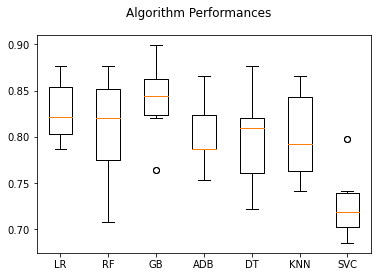

In [22]:
fig = plt.figure()
fig.suptitle('Algorithm Performances')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
#parameters = {
#    'C': [0.1, 1, 5],
#    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#    }
#model = LogisticRegression()
#GSCV = GridSearchCV(estimator=model,
#                  scoring='accuracy',
#                  n_jobs=4,
#                  param_grid=parameters,
#                  cv=kfold,
#                  verbose=1
#                  )
#GSCV.fit(X_train, y_train)

#print('Best Score: ',GSCV.best_score_)
#print('Best Parameter: ',GSCV.best_params_)
#LG = GSCV.best_estimator_

#Best Score:  0.8305493133583021
#Best Parameter:  {'C': 1, 'solver': 'newton-cg'}
LG = LogisticRegression(C=1,solver='newton-cg')
LG.fit(X_train, y_train)

LogisticRegression(C=1, solver='newton-cg')

In [25]:
#parameters = {
#    'n_estimators': [50, 100, 200],
#    'min_samples_split': [2,3,5],
#    'min_samples_leaf': [1,3,5],
#    'max_features': [1, 3, 5]
#    }
#model = RandomForestClassifier()
#GSCV = GridSearchCV(estimator=model,
#                  scoring='accuracy',
#                  n_jobs=4,
#                  param_grid=parameters,
#                  cv=kfold,
#                  verbose=1
#                  )
#GSCV.fit(X_train, y_train)

#print('Best Score: ',GSCV.best_score_)
#print('Best Parameter: ',GSCV.best_params_)
#RF = GSCV.best_estimator_

#Best Score:  0.8305368289637952
#Best Parameter:  {'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
RF = RandomForestClassifier(max_features=5,min_samples_leaf=3,min_samples_split=2,n_estimators=200)  
RF.fit(X_train, y_train)

RandomForestClassifier(max_features=5, min_samples_leaf=3, n_estimators=200)

In [26]:
#parameters = {
#    'n_estimators': [50,100,200],
#    'min_samples_leaf': [50,100,150],
#    'max_depth': [3, 5, 7],
#    'learning_rate': [0.05, 0.1, 0.2]
#    }
#model = GradientBoostingClassifier()
#GSCV = GridSearchCV(estimator=model,
#                  scoring='accuracy',
#                  n_jobs=4,
#                  param_grid=parameters,
#                  cv=kfold,
#                  verbose=1
#                  )
#GSCV.fit(X_train, y_train)

#print('Best Score: ',GSCV.best_score_)
#print('Best Parameter: ',GSCV.best_params_)
#GB = GSCV.best_estimator_

#Best Score:  0.8395505617977529
#Best Parameter:  {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 50, 'n_estimators': 100}
GB = GradientBoostingClassifier(learning_rate=0.2,max_depth=7,min_samples_leaf=50,n_estimators=100)
GB.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, min_samples_leaf=50)

In [27]:
#parameters = {
#              'base_estimator__splitter':   ['best', 'random'],
#              'algorithm': ['SAMME','SAMME.R'],
#              'n_estimators':[2, 3, 5],
#              'learning_rate':  [0.01, 0.1, 0.2, 1]}
#model = AdaBoostClassifier(tree.DecisionTreeClassifier(), random_state=5)
#GSCV = GridSearchCV(estimator=model,
#                  scoring='accuracy',
#                  n_jobs=4,
#                  param_grid=parameters,
#                  cv=kfold,
#                  verbose=1
#                  )
#GSCV.fit(X_train, y_train)

#print('Best Score: ',GSCV.best_score_)
#print('Best Parameter: ',GSCV.best_params_)
#ADB = GSCV.best_estimator_


#Best Score:  0.8238951310861424
#Best Parameter:  {'algorithm': 'SAMME.R', 'base_estimator__splitter': 'random', 'learning_rate': 0.01, 'n_estimators': 2}

ADB = AdaBoostClassifier(tree.DecisionTreeClassifier(), random_state=5, algorithm='SAMME.R',learning_rate=0.01, n_estimators=2)
ADB = ADB.fit(X_train, y_train)

In [28]:
parameters = {
              'C': [0.01, 0.1, 1, 2, 10, 100],
              'kernel': ['rbf'],
              'gamma': [0.01, 0.1, 1, 2]
              }
model = SVC(probability=True)
GSCV = GridSearchCV(estimator=model,
                  scoring='accuracy',
                  n_jobs=4,
                  param_grid=parameters,
                  cv=kfold,
                  verbose=1
                  )
GSCV.fit(X_train, y_train)

print('Best Score: ',GSCV.best_score_)
print('Best Parameter: ',GSCV.best_params_)
SVC = GSCV.best_estimator_


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   24.9s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   31.6s finished


Best Score:  0.8350187265917602
Best Parameter:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [29]:
#from sklearn.model_selection import learning_curve



#def plot_learning_curve(estimator, titles, X, y, cv, train_sizes=np.linspace(.1, 1.0, 10)):
#    
#    plt.figure()
#   train_sizes, train_scores, test_scores = \
#    learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv)
#    
#    train_scores_mean = np.mean(train_scores, axis=1)
#    train_scores_std = np.std(train_scores, axis=1)
#    test_scores_mean = np.mean(test_scores, axis=1)
#    test_scores_std = np.std(test_scores, axis=1)
#    
#    plt.plot(train_sizes, test_scores_mean, 'o-', color="r",
#         label="Validation Score")
#    plt.plot(train_sizes, train_scores_mean, 'o-', color="g",
#         label="Training Score")
#    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                         train_scores_mean + train_scores_std, alpha=0.2,
#                         color="g")
#    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                         test_scores_mean + test_scores_std, alpha=0.2,
#                         color="r")
#    
#    plt.xlabel("Train size")
#    plt.ylabel("Score")
#    plt.title(titles)
#    plt.legend(loc="best")
#
#    plt.show()
#    
#    return plt


#titles = "Learning Curves (LG)"
#estimator = LG
#plot_learning_curve(estimator, titles, X_train, y_train, cv=kfold, train_sizes=np.linspace(.1, 1.0, 10))


#titles = "Learning Curves (RF)"
#estimator = RF
#plot_learning_curve(estimator, titles, X_train, y_train, cv=kfold, train_sizes=np.linspace(.1, 1.0, 10))


#titles = "Learning Curves (GB)"
#estimator = GB
#plot_learning_curve(estimator, titles, X_train, y_train, cv=kfold, train_sizes=np.linspace(.1, 1.0, 10))


#titles = "Learning Curves (ADB)"
#estimator = ADB
#plot_learning_curve(estimator, titles, X_train, y_train, cv=kfold, train_sizes=np.linspace(.1, 1.0, 10))


#titles = "Learning Curves (SVC)"
#estimator = SVC
#plot_learning_curve(estimator, titles, X_train, y_train, cv=kfold, train_sizes=np.linspace(.1, 1.0, 10))

In [30]:
voting = VotingClassifier(estimators=[('LG', LG), ('RF', RF),
('GB', GB), ('ADB',ADB),('SVC',SVC)], voting='soft', n_jobs=4)

voting = voting.fit(X_train, y_train)

In [31]:
prediction_y = voting.predict(X_test).astype(np.int32)
submission = pd.DataFrame({'PassengerId': testid, 'Survived': prediction_y})
submission.to_csv('submission_v9.csv', index=False)